In [3]:
import os
os.getcwd()


'C:\\Users\\sruthi'

In [9]:
df = pd.read_csv(r"C:\Users\sruthi\Pictures\Downloads\train.csv")


In [11]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Basic info
df.info()

# Statistical summary
df.describe(include="all").transpose()

# Example: value counts for categorical columns
for col in ["Survived", "Pclass", "Sex", "Embarked"]:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts(dropna=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Value counts for Survived:
Survived
0    549
1    342
Name: count, dtype: int64

Value counts for Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value counts for Sex:
Sex
male      577
female    314
Name: count, dtype: in

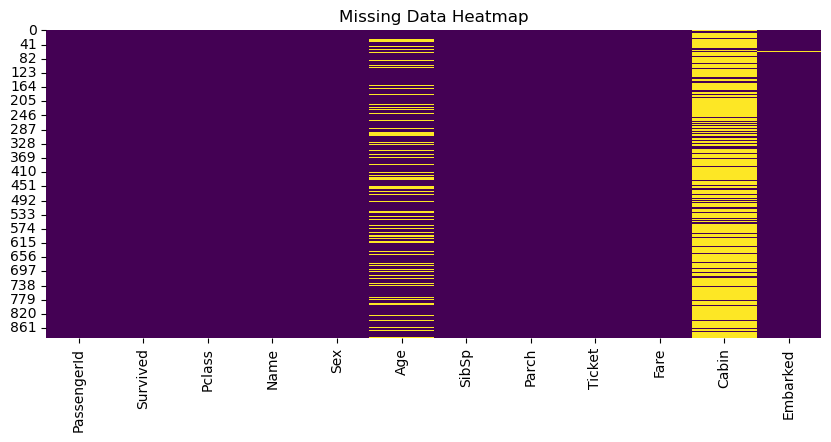

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


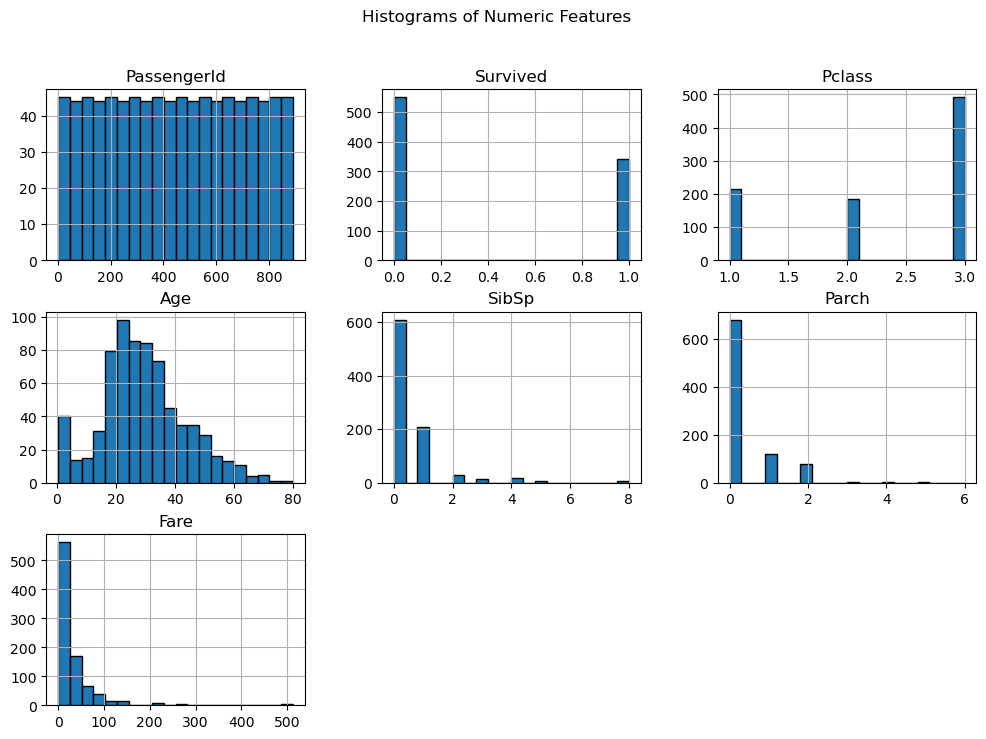

In [17]:
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols].hist(figsize=(12,8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numeric Features")
plt.show()


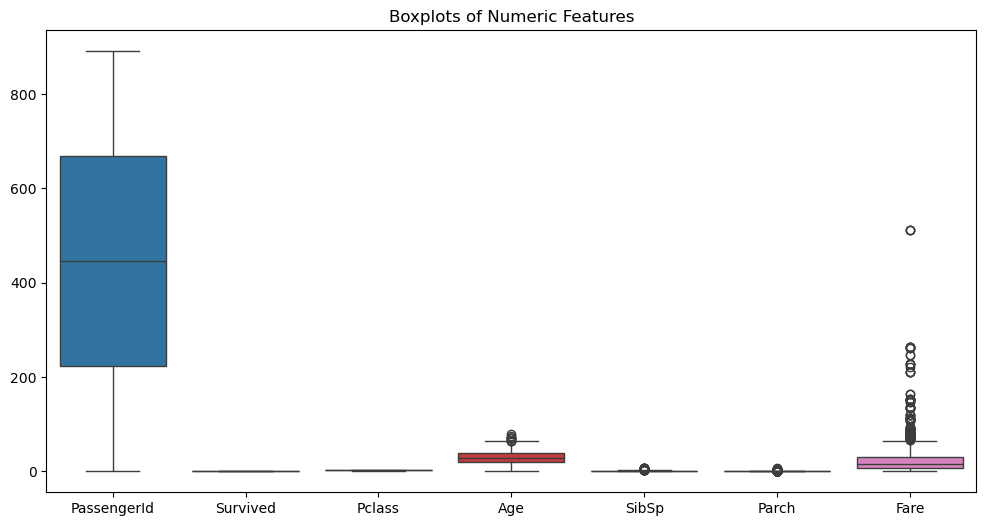

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of Numeric Features")
plt.show()


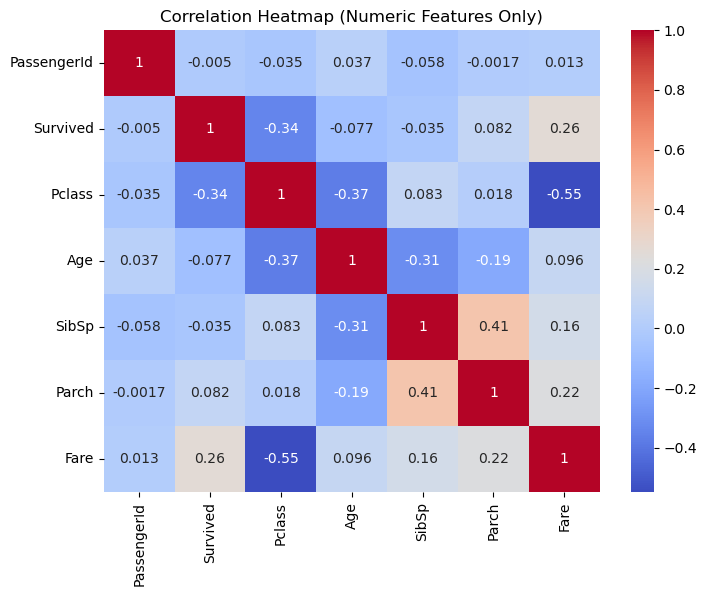

In [23]:
numeric_cols = df.select_dtypes(include="number")  # select numeric columns only

plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


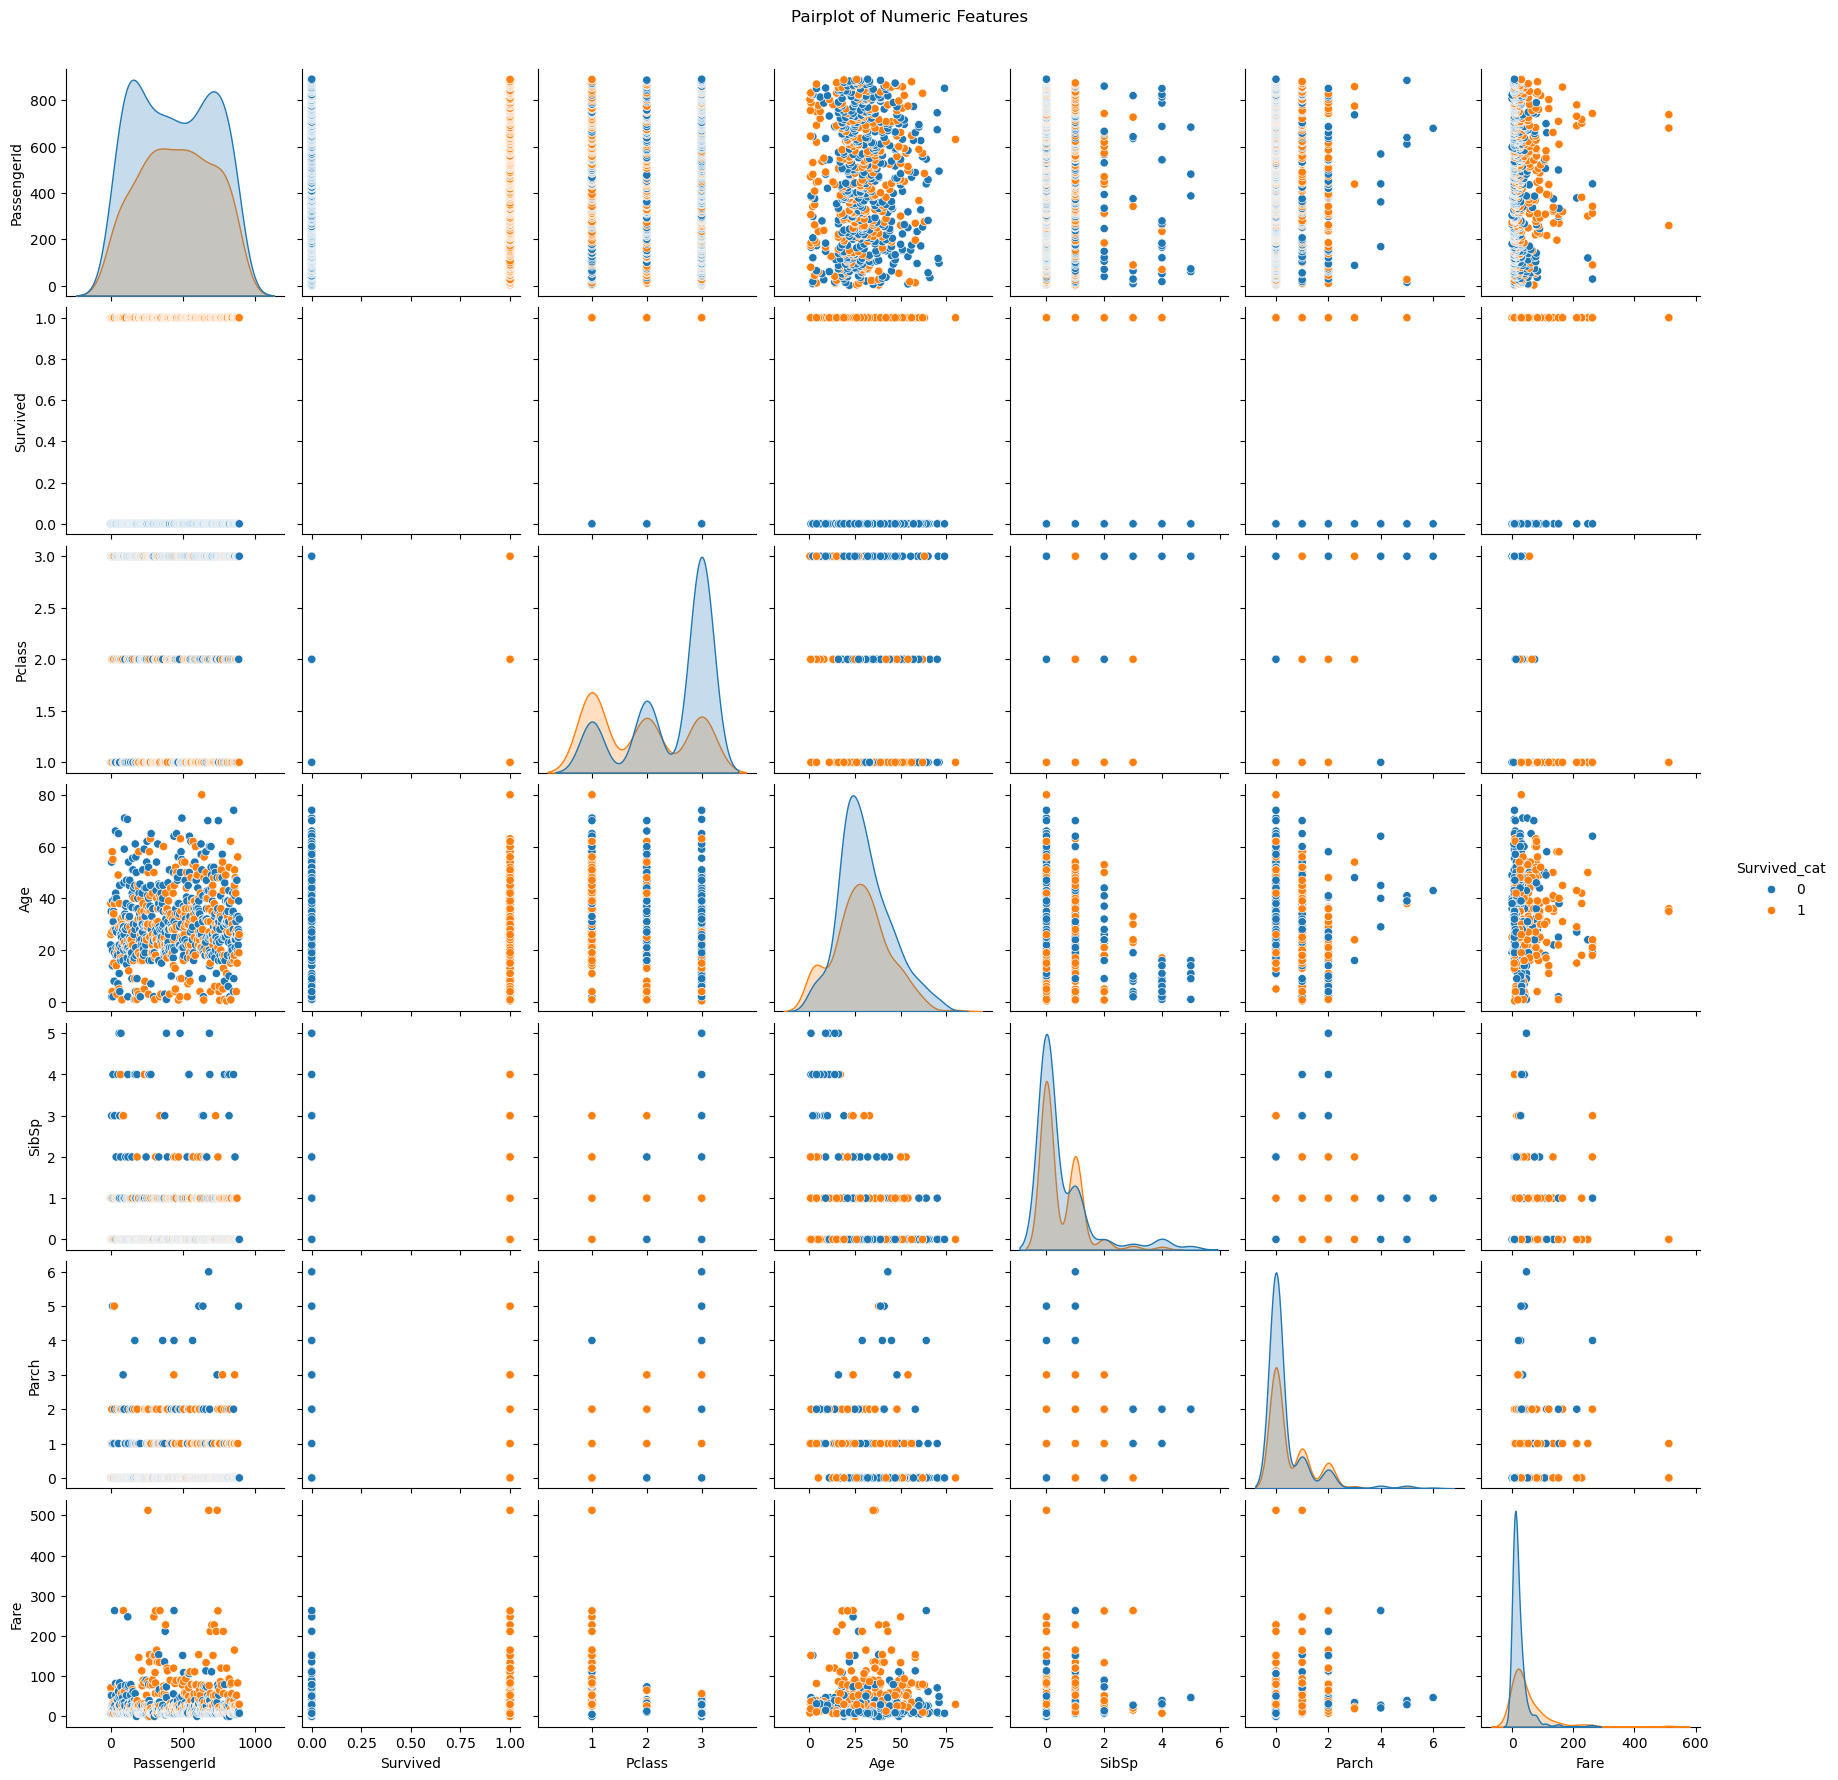

In [33]:
# Convert Survived to categorical for hue
df["Survived_cat"] = df["Survived"].astype(str)

# Ensure numeric_cols is a list of numeric column names
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Combine numeric columns with the hue column
pairplot_cols = numeric_cols + ["Survived_cat"]

# Drop rows with missing values in these columns
df_pairplot = df[pairplot_cols].dropna()

# Create the pairplot
sns.pairplot(df_pairplot, diag_kind="kde", hue="Survived_cat")
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


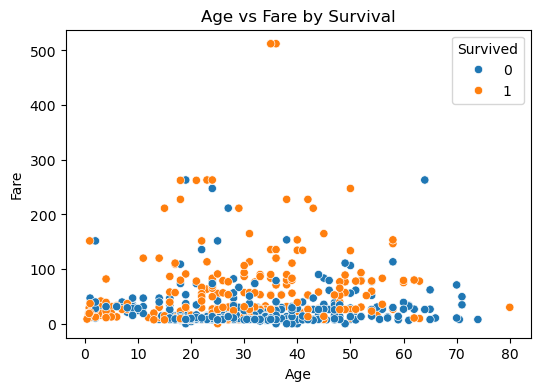

In [36]:
# Example: Age vs Fare
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df)
plt.title("Age vs Fare by Survival")
plt.show()


In [40]:
# Only numeric columns for correlation
numeric_cols = df.select_dtypes(include=np.number).columns

print("Summary of Findings:")
print("- Dataset shape:", df.shape)
print("- Missing data:\n", df.isnull().sum())
print("- Key correlations with Survived:\n", df[numeric_cols].corr()["Survived"].sort_values(ascending=False))
print("- Observed trends:")
print("  • Females had higher survival rate than males")
print("  • Higher Pclass had higher survival rate")
print("  • Large families (SibSp + Parch) sometimes had lower survival")
print("  • Age and Fare distributions are skewed; consider transformations if modeling")


Summary of Findings:
- Dataset shape: (891, 13)
- Missing data:
 PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Survived_cat      0
dtype: int64
- Key correlations with Survived:
 Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64
- Observed trends:
  • Females had higher survival rate than males
  • Higher Pclass had higher survival rate
  • Large families (SibSp + Parch) sometimes had lower survival
  • Age and Fare distributions are skewed; consider transformations if modeling
